In [43]:
# created by Ali Arslan

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(r"") # dataset yolu
df.head()

,temperature,humidity,soil_moisture,rain,pH,fertilizer_used,target
0,10.151848,45.278439,23.681333,61.958795,5.668873,0,0.0
1,10.165664,53.792567,12.104659,73.687374,5.319525,0,0.0
2,10.208564,32.200992,28.634426,9.667645,8.027711,0,0.0
3,10.275912,89.397614,48.520371,10.566468,8.172306,0,0.0
4,10.325130,50.509041,50.283508,36.794075,5.371570,1,0.0


In [3]:
# Datasetimizde 0 değer bulunan verileri bulalım
zero_counts = (df[['temperature', 'humidity', 'soil_moisture', 'rain', 'pH']] == 0).sum()
print("Sıfır (0) değer sayıları:\n", zero_counts)

Sıfır (0) değer sayıları:
 temperature      0
humidity         1
soil_moisture    0
rain             0
pH               0
dtype: int64


In [4]:
# 0 olanları silelim
df = df[df['humidity'] != 0]

In [5]:
# Datasetimizde 0 değer bulunan verileri bulalım
zero_counts = (df[['temperature', 'humidity', 'soil_moisture', 'rain', 'pH']] == 0).sum()
print("Sıfır (0) değer sayıları:\n", zero_counts)

Sıfır (0) değer sayıları:
 temperature      0
humidity         0
soil_moisture    0
rain             0
pH               0
dtype: int64


In [6]:
# Gerekirse null değer var mı kontrol edelim
print(df.isnull().sum())

temperature        0
humidity           0
soil_moisture      0
rain               1
pH                 0
fertilizer_used    0
target             1
dtype: int64


In [7]:
# rain sütununun ortalamasını al
rain_mean = df['rain'].mean()

# eksik olan değeri ortalama ile doldur
df['rain'] = df['rain'].fillna(rain_mean)


In [8]:
# Gerekirse null değer var mı kontrol edelim
print(df.isnull().sum())

temperature        0
humidity           0
soil_moisture      0
rain               0
pH                 0
fertilizer_used    0
target             1
dtype: int64


In [9]:
# Null değerleri olan satırları sil
df = df.dropna()

In [10]:
# Gerekirse null değer var mı kontrol edelim
print(df.isnull().sum())

temperature        0
humidity           0
soil_moisture      0
rain               0
pH                 0
fertilizer_used    0
target             0
dtype: int64


In [11]:
#Outlier kontrolü

In [12]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
outliers.sum()

temperature         0
humidity            0
soil_moisture       0
rain                0
pH                  0
fertilizer_used     0
target             52
dtype: int64

In [13]:
# target hedef değişkenimizi int yapalım
df['target'] = df['target'].astype(int)

In [14]:
# Son bir genel kontrol
print(df.isnull().sum())   # eksik veri var mı
print(df.dtypes)           # türler doğru mu
print(df.head())           # son haline bak

temperature        0
humidity           0
soil_moisture      0
rain               0
pH                 0
fertilizer_used    0
target             0
dtype: int64
temperature        float64
humidity           float64
soil_moisture      float64
rain               float64
pH                 float64
fertilizer_used      int64
target               int64
dtype: object
   temperature   humidity  soil_moisture       rain        pH  \
0    10.151848  45.278439      23.681333  61.958795  5.668873   
1    10.165664  53.792567      12.104659  73.687374  5.319525   
2    10.208564  32.200992      28.634426   9.667645  8.027711   
3    10.275912  89.397614      48.520371  10.566468  8.172306   
4    10.325130  50.509041      50.283508  36.794075  5.371570   

   fertilizer_used  target  
0                0       0  
1                0       0  
2                0       0  
3                0       0  
4                1       0  


In [15]:
#Korelasyon Analizi

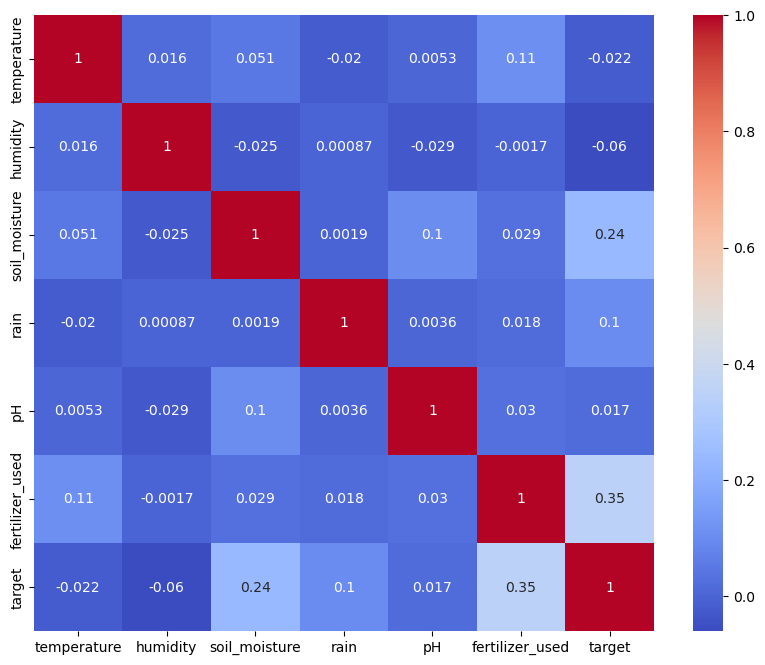

In [16]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

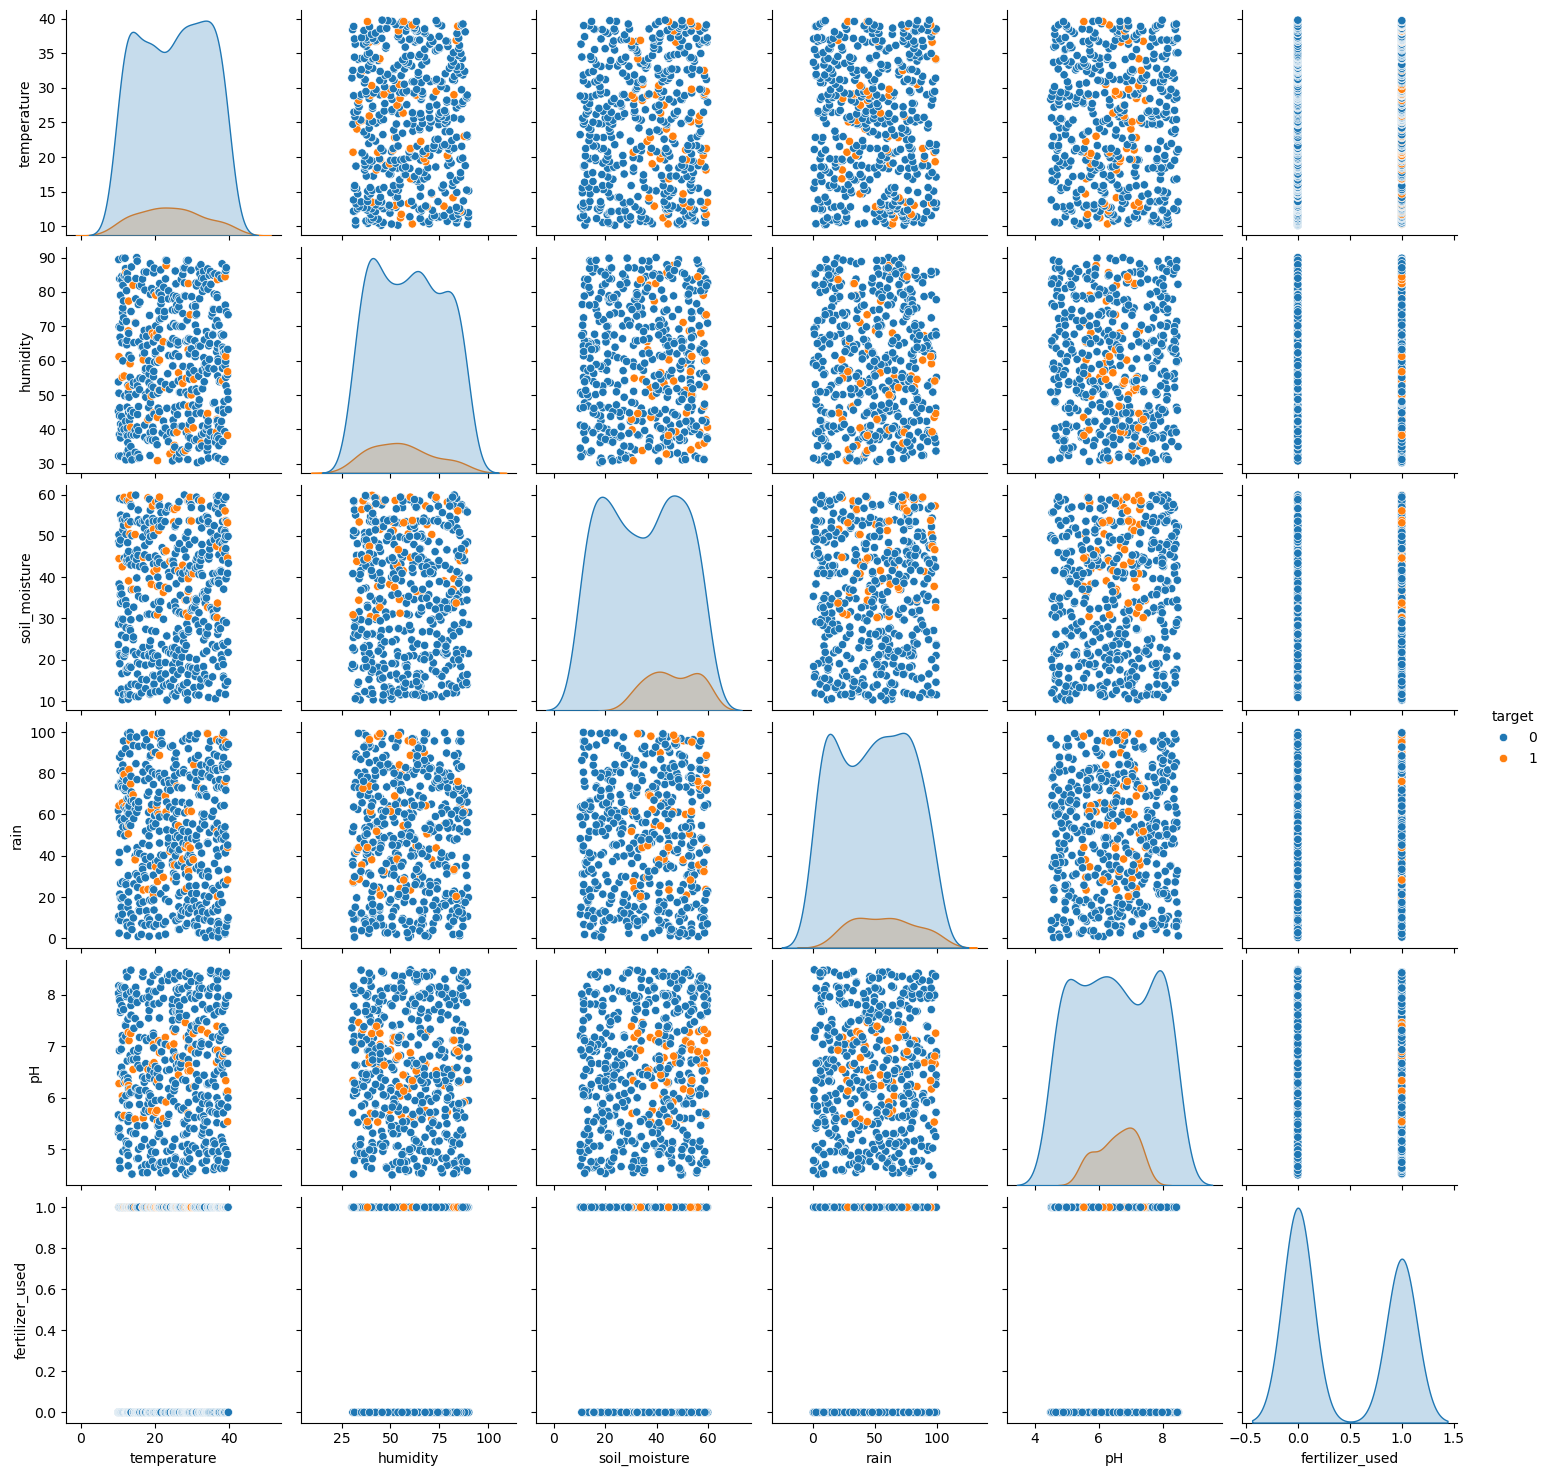

In [17]:
sns.pairplot(df, hue='target')  # Eğer target sütunun varsa

In [18]:
#target dengesiz (data)
df['target'].value_counts()

target
0    446
1     52
Name: count, dtype: int64

In [19]:
#Model Training

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_validate, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.pipeline import Pipeline

In [21]:
#Model Ayrımı

In [22]:
X = df.drop("target", axis=1)
y = df["target"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [24]:
# SMOTENC
from imblearn.over_sampling import SMOTENC

# fertilizer_used kategorik olduğu için indexi 5
categorical_features = [5]

# SMOTENC nesnesini oluştur
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)

# Sadece eğitim verisine uygula
X_train_smote, y_train_smote = smote_nc.fit_resample(X_train, y_train)


In [25]:
# SMOTENC ile hem kategorik hem de sayısal değerlerin dengelenmesi
print("Önce:", y_train.value_counts())
print("Sonra (SMOTENC):", y_train_smote.value_counts())

Önce: target
0    356
1     42
Name: count, dtype: int64
Sonra (SMOTENC): target
0    356
1    356
Name: count, dtype: int64


In [26]:
#Scaler

In [27]:
from sklearn.preprocessing import StandardScaler
# Sadece sayısal sütunları ölçekle (target ve fertilizer_used hariç)
numeric_features = ['temperature', 'humidity', 'soil_moisture', 'rain', 'pH']

scaler = StandardScaler()

# Eğitim seti: fit + transform
X_train_scaled = X_train_smote.copy()
X_train_scaled[numeric_features] = scaler.fit_transform(X_train_smote[numeric_features])

# Test seti: sadece transform
X_test_scaled = X_test.copy()
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])

# Eğer NumPy array çıktıysan şuna çevir:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [28]:
# Denenecek modeller
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(probability=True),
    "XGBoost": XGBClassifier(eval_metric="mlogloss", random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42),
    "XGBoost (Regularized)": XGBClassifier(
        eval_metric="mlogloss",
        random_state=42,
        reg_alpha=1,
        reg_lambda=1,
        gamma=1,
        max_depth=4,
        n_estimators=100,
        learning_rate=0.1
    )

}

# Sonuçları tutmak için liste
results = []


In [29]:
xgb_regularized = XGBClassifier(
    eval_metric="mlogloss",
    random_state=42,
    reg_alpha=1,       # L1 regularization
    reg_lambda=1,      # L2 regularization
    gamma=1,           # Split kararlarını zorlaştırır
    max_depth=4,       # Ağaçların boyunu sınırlar
    n_estimators=100,  # Ağaç sayısı
    learning_rate=0.1  # Öğrenme oranı
)
models["XGBoost (Regularized)"] = xgb_regularized


In [30]:
# Model Eğitimi
for name, model in models.items():
    # Eğit
    model.fit(X_train_scaled, y_train_smote)
    
    # Tahmin
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Metrikleri hesapla
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    # Sonuçları listeye ekle
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "ROC AUC": roc
    })


In [31]:
# Değerlendirme

In [32]:
# Model çıktısı

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="F1-Score", ascending=False)
display(results_df)

,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC
5,XGBoost (Regularized),1.00,1.000000,1.0,1.000000,1.000000
3,XGBoost,1.00,1.000000,1.0,1.000000,1.000000
0,Random Forest,0.99,1.000000,0.9,0.947368,1.000000
4,Neural Network,0.96,0.800000,0.8,0.800000,0.981111
2,Support Vector Machine,0.95,0.692308,0.9,0.782609,0.977778
1,Logistic Regression,0.89,0.473684,0.9,0.620690,0.946667


In [33]:
from sklearn.model_selection import StratifiedKFold, cross_validate

# Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Skorları tanımla
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Her model için çapraz doğrulama skorlarını hesapla
for name, model in models.items():
    cv_results = cross_validate(model, X_train_scaled, y_train_smote, cv=cv, scoring=scoring)
    print(f"\n📊 5-Fold CV Skorları ({name}):")
    for metric in scoring:
        mean_score = cv_results[f'test_{metric}'].mean()
        print(f"{metric.capitalize()}: {mean_score:.4f}")



📊 5-Fold CV Skorları (Random Forest):
Accuracy: 0.9986
Precision: 1.0000
Recall: 0.9972
F1: 0.9986
Roc_auc: 1.0000

📊 5-Fold CV Skorları (Logistic Regression):
Accuracy: 0.8582
Precision: 0.8098
Recall: 0.9381
F1: 0.8688
Roc_auc: 0.8918

📊 5-Fold CV Skorları (Support Vector Machine):
Accuracy: 0.9762
Precision: 0.9648
Recall: 0.9887
F1: 0.9765
Roc_auc: 0.9980

📊 5-Fold CV Skorları (XGBoost):
Accuracy: 0.9958
Precision: 0.9972
Recall: 0.9944
F1: 0.9957
Roc_auc: 0.9996

📊 5-Fold CV Skorları (Neural Network):
Accuracy: 0.9789
Precision: 0.9651
Recall: 0.9944
F1: 0.9794
Roc_auc: 0.9986

📊 5-Fold CV Skorları (XGBoost (Regularized)):
Accuracy: 0.9958
Precision: 0.9972
Recall: 0.9944
F1: 0.9957
Roc_auc: 0.9995


In [34]:
# En iyi modeli F1-Score'a göre belirleyelim
best_model = max(results, key=lambda x: x["F1-Score"])
print("En iyi model:", best_model["Model"])


En iyi model: XGBoost


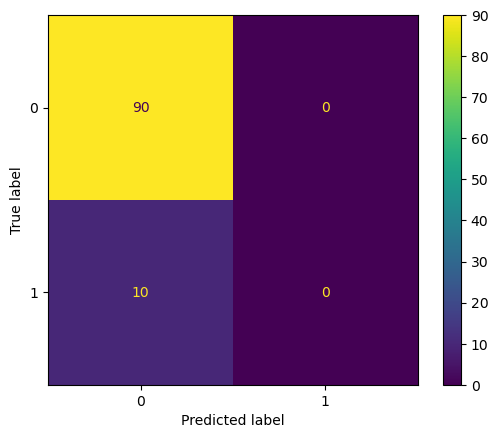

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(models["XGBoost"], X_test, y_test)

In [36]:
#Feature Importance

In [37]:
    #SHAP (SHapley Additive exPlanations)

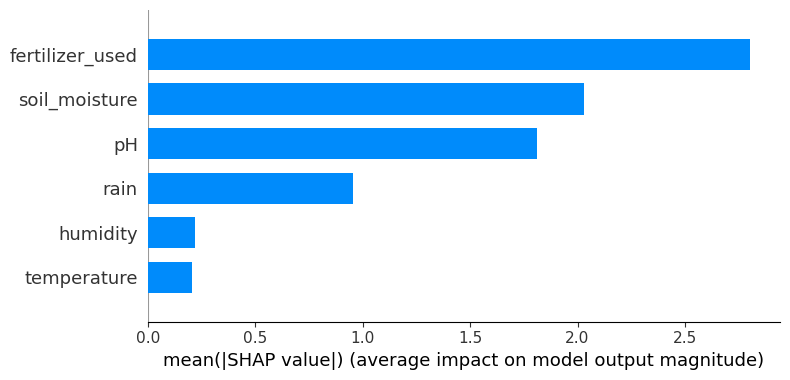

In [38]:
import shap

# XGBoost modelini seç (senin model sözlüğünden alındığını varsayıyorum)
top_model = models["XGBoost"]

# SHAP TreeExplainer'ı oluştur
explainer = shap.TreeExplainer(top_model)

# SHAP değerlerini hesapla
shap_values = explainer.shap_values(X_test_scaled_df)

# Özellik önem grafiği (bar plot)
shap.summary_plot(shap_values, X_test_scaled_df, plot_type="bar")


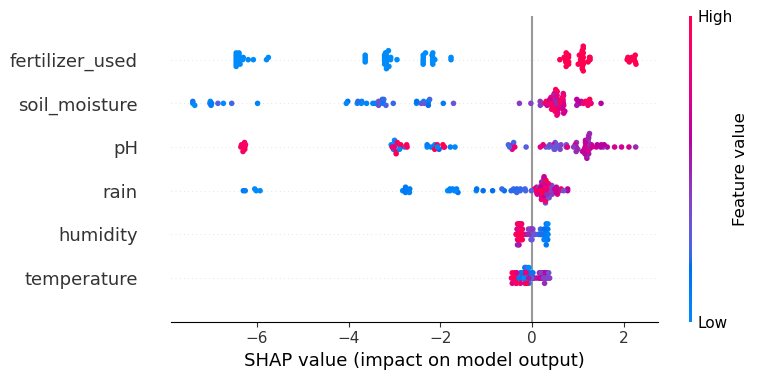

In [39]:
# Tek sınıf varsa (binary classification), doğrudan kullan:
shap.summary_plot(shap_values, X_test_scaled_df)


In [40]:
#Learning Curve

📊 Learning Curve çiziliyor: Random Forest


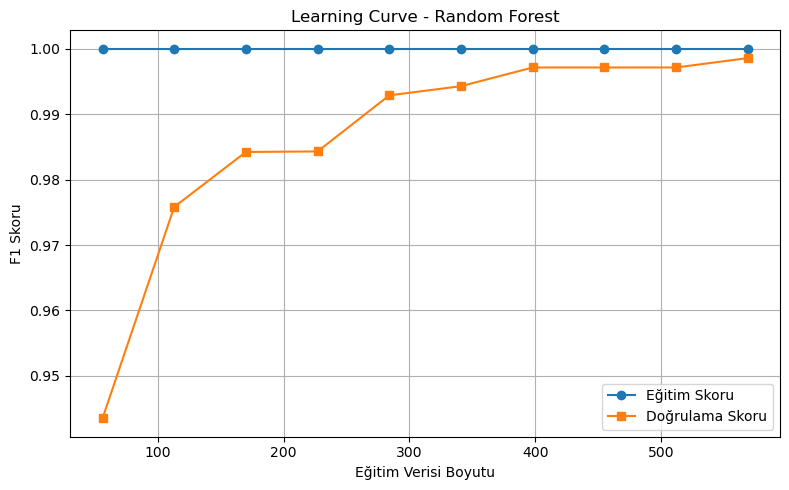

📊 Learning Curve çiziliyor: Logistic Regression


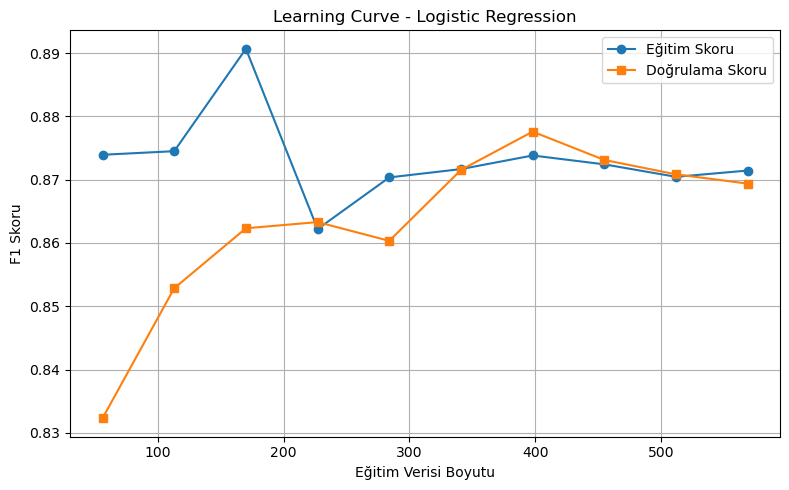

📊 Learning Curve çiziliyor: Support Vector Machine


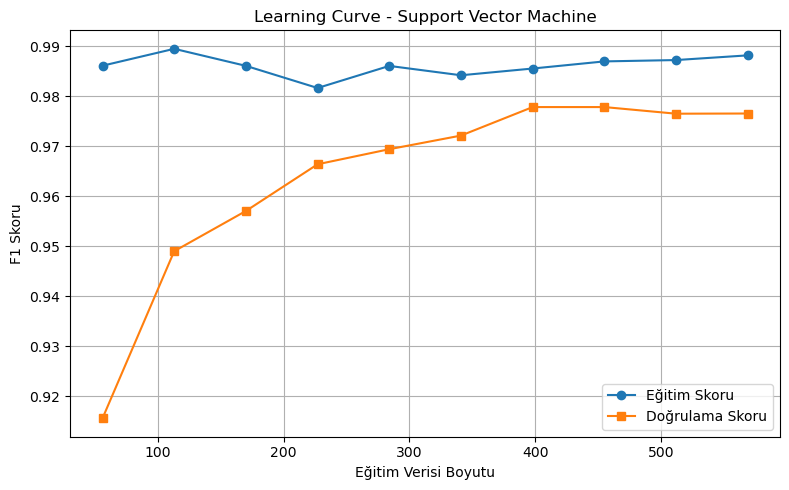

📊 Learning Curve çiziliyor: XGBoost


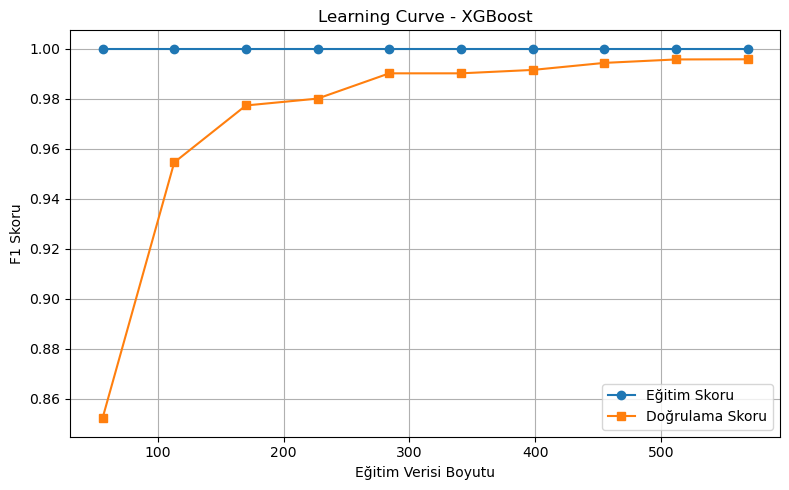

📊 Learning Curve çiziliyor: Neural Network


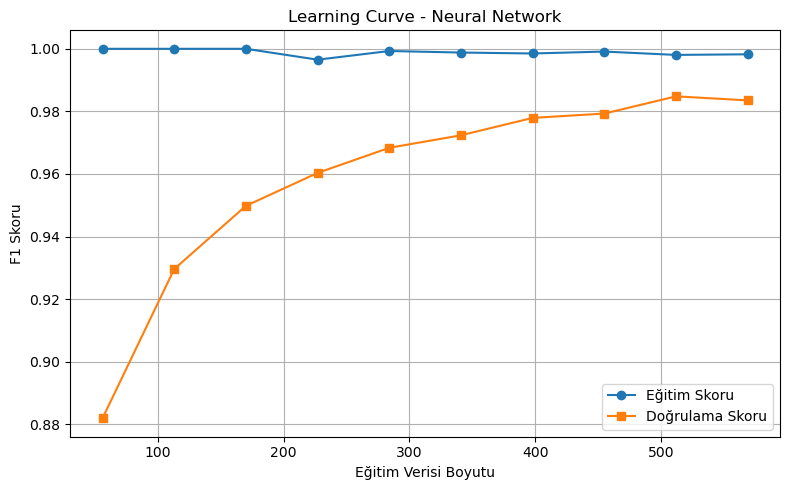

📊 Learning Curve çiziliyor: XGBoost (Regularized)


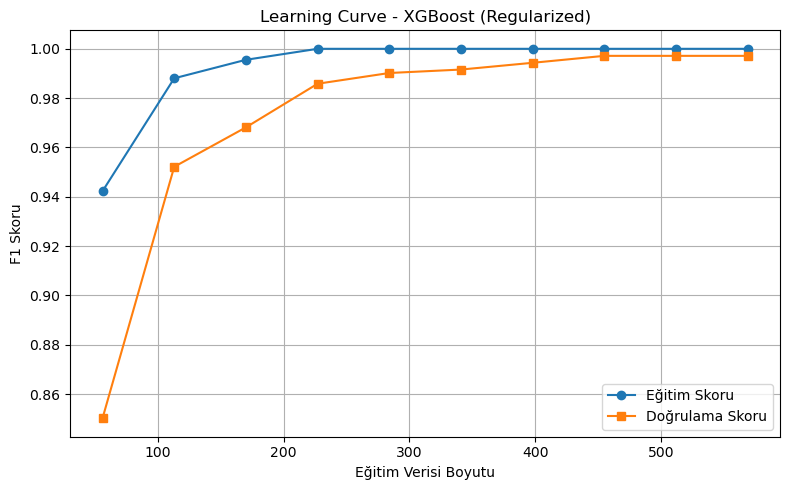

In [41]:
# Learning curve çizimi
def plot_learning_curve(model, model_name, X, y, scoring='f1'):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y,
        cv=5,
        scoring=scoring,
        train_sizes=np.linspace(0.1, 1.0, 10),
        shuffle=True,
        random_state=42
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_scores_mean, label="Eğitim Skoru", marker='o')
    plt.plot(train_sizes, val_scores_mean, label="Doğrulama Skoru", marker='s')
    plt.title(f"Learning Curve - {model_name}")
    plt.xlabel("Eğitim Verisi Boyutu")
    plt.ylabel(f"{scoring.upper()} Skoru")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Her model için çiz
for name, model in models.items():
    print(f"📊 Learning Curve çiziliyor: {name}")
    plot_learning_curve(model, name, X_train_scaled, y_train_smote, scoring='f1')